In [170]:
import numpy as np
import pandas as pd
from IPython.display import display
from dataclasses import dataclass

RAND_SEED = 47
np.random.seed(RAND_SEED)

**Load data**

In [171]:
# http://www.in2013dollars.com/1860-dollars-in-2017?amount=1
INFLATION_CPI_HIST = {
    "1913": 9.9,
    "1914": 10,
    "1915": 10.1,
    "1916": 10.9,
    "1917": 12.8,
    "1918": 15,
    "1919": 17.3,
    "1920": 20,
    "1921": 17.9,
    "1922": 16.8,
    "1923": 17.1,
    "1924": 17.1,
    "1925": 17.5,
    "1926": 17.7,
    "1927": 17.4,
    "1928": 17.2,
    "1929": 17.2,
    "1930": 16.7,
    "1931": 15.2,
    "1932": 13.6,
    "1933": 12.9,
    "1934": 13.4,
    "1935": 13.7,
    "1936": 13.9,
    "1937": 14.4,
    "1938": 14.1,
    "1939": 13.9,
    "1940": 14,
    "1941": 14.7,
    "1942": 16.3,
    "1943": 17.3,
    "1944": 17.6,
    "1945": 18,
    "1946": 19.5,
    "1947": 22.3,
    "1948": 24,
    "1949": 23.8,
    "1950": 24.1,
    "1951": 26,
    "1952": 26.6,
    "1953": 26.8,
    "1954": 26.9,
    "1955": 26.8,
    "1956": 27.2,
    "1957": 28.1,
    "1958": 28.9,
    "1959": 29.2,
    "1960": 29.6,
    "1961": 29.9,
    "1962": 30.3,
    "1963": 30.6,
    "1964": 31,
    "1965": 31.5,
    "1966": 32.5,
    "1967": 33.4,
    "1968": 34.8,
    "1969": 36.7,
    "1970": 38.8,
    "1971": 40.5,
    "1972": 41.8,
    "1973": 44.4,
    "1974": 49.3,
    "1975": 53.8,
    "1976": 56.9,
    "1977": 60.6,
    "1978": 65.2,
    "1979": 72.6,
    "1980": 82.4,
    "1981": 90.9,
    "1982": 96.5,
    "1983": 99.6,
    "1984": 103.9,
    "1985": 107.6,
    "1986": 109.6,
    "1987": 113.6,
    "1988": 118.3,
    "1989": 124,
    "1990": 130.7,
    "1991": 136.2,
    "1992": 140.3,
    "1993": 144.5,
    "1994": 148.2,
    "1995": 152.4,
    "1996": 156.9,
    "1997": 160.5,
    "1998": 163,
    "1999": 166.6,
    "2000": 172.2,
    "2001": 177.1,
    "2002": 179.9,
    "2003": 184,
    "2004": 188.9,
    "2005": 195.3,
    "2006": 201.6,
    "2007": 207.3,
    "2008": 215.3,
    "2009": 214.5,
    "2010": 218.1,
    "2011": 224.9,
    "2012": 229.6,
    "2013": 233,
    "2014": 236.7,
    "2015": 237,
    "2016": 240,
    "2017": 245.1,
    "2018": 250.5
}

In [172]:
def load_data():
    def do_load(path):
        df = pd.read_csv(path)
        display(df.head())
        print(df.info())
        display(df.describe())
        return df
    print("Train data:")
    train_df = do_load("../input/train.csv")
    print("Test data:")
    test_df = do_load("../input/test.csv")
    return (train_df, test_df)

orig_train_df, orig_test_df = load_data()
orig_test_df["revenue"] = 0.0

Train data:


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


Test data:


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482241,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


**Data transformation**

In [198]:
def transform_data(df):
    import datetime as dt
    import ast
    print("Original size: ", len(df))
    
    # Fill empty values
    df["runtime"].fillna(df.runtime.median(), inplace=True)
    df["release_date"].fillna("01/01/00", inplace=True)
    
    # Add date columns from release date
    def parse_date(s):
        items = s.split("/")
        year = items[2]
        year = "20" + year if int(year) <= 19 else "19" + year
        return dt.datetime(int(year), int(items[0]), int(items[1]))
    df["release_date_obj"] = df.release_date.map(lambda i: parse_date(i))
    df["release_year"] = df.release_date_obj.dt.year
    df["release_quarter"] = (df.release_date_obj.dt.month - 1) // 3
    df["release_month"] = df.release_date_obj.dt.month
    df["release_week"] = df.release_date_obj.map(lambda i: i.isocalendar()[1])
    df["release_day"] = df.release_date_obj.dt.day
    df["release_weekday"] = df.release_date_obj.map(lambda i: i.weekday())
    
    # Add total movies releases per period
    releases_per_year = df.groupby(["release_year"]).release_year.count()
    release_per_quarter = df.groupby(["release_year", "release_quarter"]).release_quarter.count()
    release_per_month = df.groupby(["release_year", "release_month"]).release_month.count()
    release_per_week = df.groupby(["release_year", "release_week"]).release_week.count()
    df["releases_same_year"] = df.release_year.apply(lambda year: releases_per_year.loc[year])
    df["releases_same_quarter"] = df[["release_year", "release_quarter"]].apply(lambda i: release_per_quarter.loc[(i.release_year, i.release_quarter)], axis=1)
    df["releases_same_month"] = df[["release_year", "release_month"]].apply(lambda i: release_per_month.loc[(i.release_year, i.release_month)], axis=1)
    df["releases_same_week"] = df[["release_year", "release_week"]].apply(lambda i: release_per_week.loc[(i.release_year, i.release_week)], axis=1)
    
    # Adjust budget and revenue by inflation
    def adjust_by_inflation(year, amount):
        return INFLATION_CPI_HIST["2018"] / INFLATION_CPI_HIST[str(int(year))] * amount
    df["budget_adjusted"] = df[["release_year", "budget"]].apply(lambda i: adjust_by_inflation(i.release_year, i.budget), axis=1)
    df["revenue_adjusted"] = df[["release_year", "revenue"]].apply(lambda i: adjust_by_inflation(i.release_year, i.revenue), axis=1)
    df["budget_adjusted_log"] = df["budget_adjusted"].apply(np.log1p)
    
    # Json columns to list or dict
    def parse_array(s):
        try:
            return ast.literal_eval(s)
        except:
            return []
    for col in ["genres", "production_companies", "production_countries", "spoken_languages", "Keywords", "cast", "crew", "belongs_to_collection"]:
        df[col].fillna("['name': 'empty', 'job': 'empty']", inplace=True)
    df["genres"] = df.genres.map(lambda s: [i["name"] for i in parse_array(s)])
    df["production_companies"] = df.production_companies.map(lambda s: [i["name"] for i in parse_array(s)])
    df["production_countries"] = df.production_countries.map(lambda s: [i["name"] for i in parse_array(s)])
    df["spoken_languages"] = df.spoken_languages.map(lambda s: [i["name"] for i in parse_array(s)])
    df["keywords"] = df.Keywords.map(lambda s: [i["name"] for i in parse_array(s)])
    df["cast"] = df.cast.map(lambda s: parse_array(s))
    df["actors"] = df.cast.map(lambda c: [i["name"] for i in c])
    df["crew"] = df.crew.map(lambda s: [(i["job"], i["name"]) for i in parse_array(s)])
    df["collections"] = df.belongs_to_collection.map(lambda s: [i["name"] for i in parse_array(s)])
    
    # Add columns for relevant crew members
    def find_crew_job(row, job):
        return [i[1] for i in row if i[0] == job]
    df["crew_producer"] = df.crew.map(lambda i: find_crew_job(i, "Producer"))
    df["crew_exec_producer"] = df.crew.map(lambda i: find_crew_job(i, "Executive Producer"))
    df["crew_director"] = df.crew.map(lambda i: find_crew_job(i, "Director"))
    df["crew_screenplay"] = df.crew.map(lambda i: find_crew_job(i, "Screenplay"))
    df["crew_editor"] = df.crew.map(lambda i: find_crew_job(i, "Editor"))
    df["crew_casting"] = df.crew.map(lambda i: find_crew_job(i, "Casting"))
    df["crew_photography"] = df.crew.map(lambda i: find_crew_job(i, "Director of Photography"))
    df["crew_music"] = df.crew.map(lambda i: find_crew_job(i, "Original Music Composer"))
    df["crew_writer"] = df.crew.map(lambda i: find_crew_job(i, "Writer"))
    df["crew_art"] = df.crew.map(lambda i: find_crew_job(i, "Art Direction"))
    
    # Gender
    df["actors_gender_0"] = df.cast.map(lambda c: sum(1 for i in c if i["gender"] == 0))
    df["actors_gender_1"] = df.cast.map(lambda c: sum(1 for i in c if i["gender"] == 1))
    df["actors_gender_2"] = df.cast.map(lambda c: sum(1 for i in c if i["gender"] == 2))
    df["actors_first_gender"] = df.cast.map(lambda c: c[0]["gender"] if len(c) > 0 else 0)
    df["actors_second_gender"] = df.cast.map(lambda c: c[1]["gender"] if len(c) > 1 else 0)
    df["actors_third_gender"] = df.cast.map(lambda c: c[2]["gender"] if len(c) > 2 else 0)
    
    # Add columns for crew and actors size
    df["crew_size"] = df.crew.map(lambda i: len(i))
    df["actors_size"] = df.actors.map(lambda i: len(i))
    
    # Revenue to millions and log scale
    df["revenue_log"] = df["revenue"].apply(np.log1p)
    df["revenue"] = df["revenue"] / 1000000.0
    
    # Add column if it belongs to a collection
    df["has_collection"] = df.collections.map(lambda i: 1 if len(i) > 0 else 0)
    
    # Add column if it has a homepage
    df["has_homepage"] = 0
    df.loc[df.homepage.isnull() == False, "has_homepage"] = 1
    
    # Split text columns into tokens
    from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    ignore_tokens = set(ENGLISH_STOP_WORDS)
    ignore_tokens.update(["", "-", "--", "äì", "&"])
    for col in ["title", "original_title", "tagline", "overview"]:
        df[col].fillna("", inplace=True)
    def clean_str(s):
        for i in [".", "\"", "\'", ",", ":"]:
            s = s.replace(i, "")
        return s
    def create_tokens(s):
        tokens = [clean_str(i.lower().strip()) for i in s.split(" ")]
        return [i for i in tokens if i not in ignore_tokens]
    df["title_tokens"] = df.title.map(lambda i: create_tokens(i))
    df["original_title_tokens"] = df.original_title.map(lambda i: create_tokens(i))
    df["tagline_tokens"] = df.tagline.map(lambda i: create_tokens(i))
    df["overview_tokens"] = df.overview.map(lambda i: create_tokens(i))
    
    # Drop columns
    df.drop(["belongs_to_collection", "homepage", "imdb_id", "original_title", "overview", "poster_path", "release_date", 
             "tagline", "cast", "Keywords", "status"], axis=1, inplace=True, errors="ignore")
    
    
    print("Altered size: ", len(df))
    display(df.head())
    return df


train_df = transform_data(orig_train_df.copy())
test_df = transform_data(orig_test_df.copy())

Original size:  3000
Altered size:  3000


,id,budget,genres,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,title,crew,revenue,release_date_obj,release_year,release_quarter,release_month,release_week,release_day,release_weekday,releases_same_year,releases_same_quarter,releases_same_month,releases_same_week,budget_adjusted,revenue_adjusted,budget_adjusted_log,keywords,actors,collections,crew_producer,crew_exec_producer,crew_director,crew_screenplay,crew_editor,crew_casting,crew_photography,crew_music,crew_writer,crew_art,actors_gender_0,actors_gender_1,actors_gender_2,actors_first_gender,actors_second_gender,actors_third_gender,crew_size,actors_size,revenue_log,has_collection,has_homepage,title_tokens,original_title_tokens,tagline_tokens,overview_tokens
0,1,14000000,[Comedy],en,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],93.0,[English],Hot Tub Time Machine 2,"[(First Assistant Director, Kelly Cantley), (D...",12.314651,2015-02-20,2015,0,2,8,20,4,128,18,5,2,1.479747e+07,1.301612e+07,16.509967,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...",[Hot Tub Time Machine Collection],[Andrew Panay],"[Rob Corddry, Ben Ormand, Matt Moore]",[Steve Pink],[],[Jamie Gross],[Susie Farris],[Declan Quinn],[Christophe Beck],[Josh Heald],[Jason Baldwin Stewart],6,8,10,2,2,2,72,24,16.326300,1,0,"[hot, tub, time, machine, 2]","[hot, tub, time, machine, 2]","[laws, space, time, violated]","[lou, father, internet, shot, unknown, assaila..."
1,2,40000000,"[Comedy, Drama, Family, Romance]",en,8.248895,[Walt Disney Pictures],[United States of America],113.0,[English],The Princess Diaries 2: Royal Engagement,"[(Director, Garry Marshall), (Director of Phot...",95.149435,2004-08-06,2004,2,8,32,6,4,83,21,5,3,5.304394e+07,1.261775e+08,17.786631,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",[The Princess Diaries Collection],"[Whitney Houston, Mario Iscovich, Debra Martin...",[Ellen H. Schwartz],[Garry Marshall],[Shonda Rhimes],[Bruce Green],[],[Charles Minsky],[John Debney],[],[],0,10,10,1,1,2,9,20,18.370959,1,0,"[princess, diaries, 2, royal, engagement]","[princess, diaries, 2, royal, engagement]","[lifetime, true, love;, shes, got, 30, days!]","[mia, thermopolis, college, graduate, way, gen..."
2,3,3300000,[Drama],en,64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],105.0,[English],Whiplash,"[(Casting, Terri Taylor), (Music Editor, Richa...",13.092000,2014-10-10,2014,3,10,41,10,4,123,30,18,7,3.492395e+06,1.385529e+07,15.066099,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...",[],"[David Lancaster, Michel Litvak, Jason Blum, H...","[Jason Reitman, Gary Michael Walters, Jeanette...",[Damien Chazelle],[Damien Chazelle],[Tom Cross],"[Terri Taylor, Barbara Harris]",[Sharone Meir],[Justin Hurwitz],[],[Hunter Brown],31,7,13,2,2,1,64,51,16.387512,0,1,[whiplash],[whiplash],"[road, greatness, edge]","[direction, ruthless, instructor, talented, yo..."
3,4,1200000,"[Thriller, Drama]",hi,3.174936,[],[India],122.0,"[English, हिन्दी]",Kahaani,"[(Director, Sujoy Ghosh), (Producer, Sujoy Gho...",16.000000,2012-03-09,2012,0,3,10,9,4,125,25,13,7,1.309233e+06,1.745645e+07,14.084953,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",[],[Sujoy Ghosh],[],[Sujoy Ghosh],[],[],[],[],[],[Sujoy Ghosh],[],4,1,2,1,2,0,3,7,16.588099,0,1,[kahaani],[kahaani],[],"[vidya, bagchi, (vidya, balan), arrives, kolka..."
4,5,0,"[Action, Thriller]",ko,1.148070,[],[South Korea],118.0,[한국어/조선말],Marine Boy,"[(Director, Jong-seok Yoon), (Writer, Jong-seo...",3.923970,2009-02-05,2009,0,2,6,5,3,106,31,7,3,0.000000e+00,4.582538e+06,0.000000,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...",[],[],[],[Jong-seok Yoon],[],[],[],[],[],[Jong-seok Yoon],[],0,0,4,2,2,2,2,4,15.182615,0,0,"[marine, boy]",[마린보이],[],

Original size:  4398
Altered size:  4398


,id,budget,genres,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,title,crew,revenue,release_date_obj,release_year,release_quarter,release_month,release_week,release_day,release_weekday,releases_same_year,releases_same_quarter,releases_same_month,releases_same_week,budget_adjusted,revenue_adjusted,budget_adjusted_log,keywords,actors,collections,crew_producer,crew_exec_producer,crew_director,crew_screenplay,crew_editor,crew_casting,crew_photography,crew_music,crew_writer,crew_art,actors_gender_0,actors_gender_1,actors_gender_2,actors_first_gender,actors_second_gender,actors_third_gender,crew_size,actors_size,revenue_log,has_collection,has_homepage,title_tokens,original_title_tokens,tagline_tokens,overview_tokens
0,3001,0,"[Adventure, Animation, Family, Fantasy]",ja,3.851534,[],"[Japan, United States of America]",90.0,"[English, 日本語]",Pokémon: The Rise of Darkrai,"[(Director, Kunihiko Yuyama), (Writer, Hideki ...",0.0,2007-07-14,2007,2,7,28,14,5,153,43,9,5,0.000000e+00,0.0,0.000000,"[pok√©mon, pocket monsters]","[Craig Blair, Emily Bauer, Sarah Natochenny, I...",[Pokémon Collection],[],[],[Kunihiko Yuyama],[],[],[],[],[],[Hideki Sonoda],[],4,3,0,0,1,1,2,7,0.0,1,1,"[pokémon, rise, darkrai]",[ディアルガvsパルキアvsダークライ],"[time, space, legend, born]","[ash, friends, (this, time, accompanied, newco..."
1,3002,88000,"[Horror, Science Fiction]",en,3.559789,[Woolner Brothers Pictures Inc.],[United States of America],65.0,[English],Attack of the 50 Foot Woman,"[(Editor, Edward Mann), (Director of Photograp...",0.0,1958-05-19,1958,1,5,21,19,0,5,3,2,1,7.627682e+05,0.0,13.544711,"[revenge, alien, b movie, cheating husband, vi...","[Allison Hayes, William Hudson, Yvette Vickers...",[],[Bernard Woolner],[Jacques R. Marquette],[Nathan H. Juran],[],[Edward Mann],[],[Jacques R. Marquette],[Ronald Stein],[Mark Hanna],[],6,2,2,1,0,1,8,10,0.0,0,0,"[attack, 50, foot, woman]","[attack, 50, foot, woman]","[titanic, beauty, spreads, macabre, wave, horr...","[abused, wife, grows, giant, size, alien, enco..."
2,3003,0,"[Comedy, Romance]",en,8.085194,"[Warner Bros., Outlaw Productions (I), Miramax]",[United States of America],100.0,[English],Addicted to Love,"[(Director, Griffin Dunne), (Producer, Robert ...",0.0,1997-05-23,1997,1,5,21,23,4,95,19,8,2,0.000000e+00,0.0,0.000000,"[jealousy, love, revenge, break-up]","[Meg Ryan, Matthew Broderick, Kelly Preston, T...",[],"[Robert F. Newmyer, Jeffrey Silver]",[],[Griffin Dunne],[Robert Gordon],[Elizabeth Kling],[],[Andrew Dunn],[Rachel Portman],[],[Stephen Alesch],0,4,5,1,2,1,10,9,0.0,0,0,"[addicted, love]","[addicted, love]","[comedy, lost, loves, laughs]","[good-natured, astronomer, sam, devastated, lo..."
3,3004,6800000,"[Drama, War, Mystery]",fr,8.596012,"[TS Productions, Micro scope, Phi Group]","[Canada, France]",130.0,"[Français, العربية, English]",Incendies,"[(Special Effects Supervisor, Louis Craig), (C...",0.0,2010-09-04,2010,2,9,35,4,5,180,55,28,8,7.810179e+06,0.0,15.870939,"[prison, middle east, rape, muslim, militia, i...","[Lubna Azabal, M√©lissa D√©sormeaux-Poulin, Ma...",[],[Kim McCraw],[],[Denis Villeneuve],[],[Monique Dartonne],"[Lucie Robitaille, Constance Demontoy, Lara At...",[Andr√© Turpin],[Gr√©goire Hetzel],"[Denis Villeneuve, Wajdi Mouawad]",[],15,3,5,1,1,0,69,23,0.0,0,1,[incendies],[incendies],"[search, began, opening, mothers]","[mothers, wishes, send, twins, jeanne, simon, ..."
4,3005,2000000,"[History, Documentary]",en,3.217680,[],[United States of America],92.0,[English],Inside Deep Throat,"[(Producer, Brian Grazer), (Executive Producer...",0.0,2005-02-11,2005,0,2,6,11,4,137,31,14,4,2.565284e+06,0.0,14.757580,"[usa, 1970s, sexual revolution, unsimulated sex]","[Dennis Hopper, Peter Bart, Warren Beatty, Car...",[],"[Brian Grazer, Ron Howard, Fenton Bailey, Rand...",[Kim Roth],"[Fenton Bailey, Randy Barbato]","[Fenton Bailey, Randy Barbato]","[Jeremy Simmons, William Grayburn]",[],"[Teodoro Maniaci, David Kempner]",[David Benjamin Steinberg],

In [185]:
OTHER_CATEGORY = "other"
#CATEGORICAL_METHOD = "LARGEST_REVENUE"
CATEGORICAL_METHOD = "MOST_COMMON"

def get_categorical_best_values(df, col, n):
    return get_values_with_largest_revenue(df, col, n) if CATEGORICAL_METHOD == "LARGEST_REVENUE" else get_most_common_values(df, col, n)

def get_values_with_largest_revenue(df, col, n):
    data = []
    for _, row in df[[col, "revenue_adjusted"]].iterrows():
        row_values = row[col] if type(row[col]) == list else list([row[col]])
        for a in row_values:
            data.append([a, row["revenue_adjusted"]])
    actors_df = pd.DataFrame(data, columns=[col, "revenue"])
    actors_df = actors_df.groupby(col).sum().sort_values(by="revenue", ascending=False)
    values = set(i for i in actors_df.head(n).index.values)
    values.add(OTHER_CATEGORY)
    return values

def get_most_common_values(df, col, n):
    from collections import Counter
    values = df[col].values
    if type(values[0]) == list: 
        values = [i for items in values for i in items]
    most_common = set(word for word, _ in Counter(values).most_common(n))
    most_common.add(OTHER_CATEGORY)
    return most_common

In [ ]:
for i in ["actors", "keywords", "production_companies", "crew_director", "crew_producer", "crew_music", "crew_screenplay", "collections", 
         "title_tokens", "overview_tokens", "tagline_tokens", "original_title_tokens", "original_language"]:
    print(i, ":")
    for v in get_categorical_best_values(train_df, i, 20):
        print("\t", v)

**Data exploration**

In [ ]:
def explore_budget_revenue(df):
    df.plot(kind='scatter', x='budget_adjusted', y='revenue_adjusted', color='red', figsize=(10, 10), title="Budget vs Revenue (Inflation adj)")

    
explore_budget_revenue(train_df)

In [ ]:
def explore_budget(df):
    import matplotlib.pyplot as plt
    df = df.copy()
    df["budget_log"] = df["budget"].apply(np.log1p)
    df["revenue_log"] = df["revenue"].apply(np.log1p)
    
    plt.figure(figsize=(15, 8))
    plt.subplot(2, 2, 1)
    plt.title("Revenue histogram")
    df["revenue"].hist(bins=100)
    
    plt.subplot(2, 2, 2)
    plt.title("Log Revenue histogram")
    df["revenue_log"].hist(bins=100)
    
    plt.subplot(2, 2, 3)
    plt.title("Budget histogram")
    df["budget"].hist(bins=100)
    
    plt.subplot(2, 2, 4)
    plt.title("Log Budget histogram")
    df["budget_log"].hist(bins=100)
    plt.show()
    
    df.plot(kind="scatter", x="budget", y="revenue", title="Budget vs Revenue", figsize=(10, 8))
    df.plot(kind="scatter", x="budget_log", y="revenue_log", title="Log Budget vs Log Revenue", figsize=(10, 8))
    
    
explore_budget(orig_train_df)

In [ ]:
def explore_release_date(df):
    print("Release year")
    max_year = df.groupby("release_year").release_year.count().idxmax()
    print("First year: {}, Latest year: {}, Max year: {}".format(df.release_year.min(), df.release_year.max(), max_year))
    df["release_year"].hist(bins=100, figsize=(10,10))
    print("Years with most releases:")
    print(df.groupby("release_year").release_year.value_counts().nlargest(20))
    
explore_release_date(train_df)

In [ ]:
def explore_genres(df):
    import matplotlib.pyplot as plt
    print("Genres")
    data = [i for values in df.genres.values for i in values]
    all_genres = set(data)
    print("All genres {}: {}".format(all_genres, len(all_genres)))
    data_dict = dict([(g, 0) for g in all_genres])
    for g in data:
        data_dict[g] += 1
        
    plt.figure(figsize=(20,10))   
    plt.hist(data, bins=len(all_genres))
    plt.show()
    
explore_genres(train_df)

In [ ]:
def explore_popularity(df):
    df.plot(kind="scatter", x="popularity", y="revenue_adjusted", figsize=(10,10), title="Popularity vs Revenue")
    df[df.popularity < 20].plot(kind="scatter", x="popularity", y="revenue_adjusted", figsize=(10,10), title="Popularity vs Revenue (0-20)")
    
explore_popularity(train_df)

In [ ]:
def explore_runtime(df):
    df.plot(kind="scatter", x="runtime", y="revenue_adjusted", figsize=(10, 10), title="Runtime vs Revenue")
    
explore_runtime(train_df)

In [ ]:
def explore_actors(df):
    data = []
    for _, row in df[["actors", "revenue_adjusted"]].iterrows():
        rev = row["revenue_adjusted"] / 1000000.0
        for a in row["actors"]:
            data.append([a, rev])
    actors_df = pd.DataFrame(data, columns=["actor", "revenue"])
    actors_df = actors_df.groupby("actor").sum().sort_values(by="revenue", ascending=False)
    display(actors_df.head(30))
    
    
explore_actors(train_df)


In [ ]:
def explore_crew(df):
    import ast
    def parse_array(s):
        try:
            return ast.literal_eval(s)
        except:
            return []
    df = df[["crew", "revenue"]].copy()
    df["crew"].fillna("['job': 'empty']", inplace=True)
    df["crew"] = df.crew.map(lambda s: [i for i in parse_array(s)])
    crew_dict = {}
    for crew in df["crew"].values:
        for i in crew:
            crew_dict[i["job"]] = crew_dict.get(i["job"], 0) + 1
    return crew_dict


crew_dict = explore_crew(orig_train_df)
sorted(crew_dict.items(), key=lambda i: i[1], reverse=True)

In [ ]:
def explore_movie_crew(df, name):
    import ast
    return ast.literal_eval(df[df.title.str.contains(name, case=False)]["crew"].values[0])

#[(i["job"], i["name"]) for i in explore_movie_crew(orig_train_df, "Jurassic")]
#[(i["job"], i["name"]) for i in explore_movie_crew(orig_train_df, "Back to the future")]
[(i["job"], i["name"]) for i in explore_movie_crew(orig_train_df, "Titanic")]

**Create samples**

In [199]:
@dataclass
class Feature:
    col: str
    ftype: str
    cat_size: int = 500
        
TRAIN_SET_SIZE = 0.8
LABEL_COL = "revenue_log"
        
FEATURES = [
    Feature("genres", "categorical"),
    Feature("actors_first_gender", "categorical"),
    Feature("actors_second_gender", "categorical"),
    Feature("actors_third_gender", "categorical"),
    Feature("original_language", "categorical_constrained", 10),
    Feature("production_countries", "categorical_constrained", 10),
    Feature("spoken_languages", "categorical_constrained", 10),
    Feature("production_companies", "categorical_constrained", 10),
    Feature("actors", "categorical_constrained", 30),
    Feature("crew_producer", "categorical_constrained", 20),
    Feature("crew_exec_producer", "categorical_constrained", 20),
    Feature("crew_director", "categorical_constrained", 20),
    Feature("crew_screenplay", "categorical_constrained", 20),
    Feature("crew_editor", "categorical_constrained", 20),
    Feature("crew_casting", "categorical_constrained", 20),
    Feature("crew_photography", "categorical_constrained", 20),
    Feature("crew_music", "categorical_constrained", 20),
    Feature("crew_writer", "categorical_constrained", 20),
    Feature("crew_art", "categorical_constrained", 20),    
    Feature("keywords", "categorical_constrained", 30),
    Feature("title_tokens", "categorical_constrained", 30),    
    #Feature("original_title_tokens", "categorical_constrained", 30),    
    #Feature("tagline_tokens", "categorical_constrained", 30),    
    #Feature("overview_tokens", "categorical_constrained", 30),    
    Feature("budget_adjusted_log", "numerical"),
    #Feature("release_year", "categorical_constrained", 10),
    Feature("release_quarter", "categorical"),
    Feature("release_month", "categorical"),
    Feature("release_week", "categorical_constrained", 10),
    Feature("release_weekday", "categorical"),
    Feature("releases_same_year", "numerical"),
    Feature("releases_same_quarter", "numerical"),
    Feature("releases_same_month", "numerical"),
    Feature("releases_same_week", "numerical"),
    Feature("runtime", "numerical"),
    Feature("has_collection", "numerical"),
    Feature("has_homepage", "numerical"),
    Feature("crew_size", "numerical"),
    Feature("actors_size", "numerical"),
    Feature("actors_gender_0", "numerical"),
    Feature("actors_gender_1", "numerical"),
    Feature("actors_gender_2", "numerical"),
    Feature("popularity", "numerical")
]
FEATURES_COL = [f.col for f in FEATURES]

def create_samples(df, categories_dict, trainSetProportion, log=True):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split
    
    # Convert categorical columns to one hot encoding
    for f in FEATURES:
        if f.ftype in ["categorical", "categorical_constrained"]:
            df[f.col] = df[f.col].apply(lambda i: labels_to_one_hot(i, f, categories_dict))
    
    # Normalize numeric columns
    scaler = MinMaxScaler()
    numeric_cols = [f.col for f in FEATURES if f.ftype == "numerical"]
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    # Create samples
    tot_samples = len(df)
    tot_features = sum(1 if f.ftype == "numerical" else len(categories_dict[f.col]) for f in FEATURES)
    X = np.zeros((tot_samples, tot_features), dtype="float32")
    Y = np.zeros((tot_samples, 1), dtype="float32")
    for i in range(tot_samples):
        fidx = 0
        for f in FEATURES:
            col_value = df[f.col].iloc[i]
            col_len = 1 if f.ftype == "numerical" else len(col_value)
            X[i, fidx : fidx + col_len] = col_value
            fidx += col_len
        Y[i] = df[LABEL_COL].iloc[i]
        
    if log:
        print("All X: ", X.shape)
        print("All Y: ", Y.shape)
    
    # Split in train-test set
    if trainSetProportion < 1.0:
        X_train, X_test, Y_train, Y_test, df_train, df_test = train_test_split(X, Y, df, test_size=1-trainSetProportion, random_state=RAND_SEED)
        if log:
            print("Train set:", X_train.shape, Y_train.shape, X_train.dtype)
            print("Test set:", X_test.shape, Y_test.shape)
    else:
        X_train = X
        X_test = X
        Y_train = Y
        Y_test = Y
        df_train = df
        df_test = df
    return (X_train, X_test, Y_train, Y_test, df_train, df_test, categories_dict)

def create_categories_dict(df):
    categories_dict = {}
    for f in (f for f in FEATURES if f.ftype in ["categorical"]):
        categories_dict[f.col] = labels_to_dict(df[f.col])
    for f in (f for f in FEATURES if f.ftype == "categorical_constrained"):
        categories_dict[f.col] = dict((k, i)for i, k in enumerate(get_most_common_values(df, f.col, f.cat_size)))
        
    print("Categories:")
    for categ, categ_map in categories_dict.items():
        print("\t{}: {}".format(categ, len(categ_map)))
    return categories_dict
    
def labels_to_dict(df_col):
    s = set()
    for items in df_col.values:
        items = items if type(items) == list else list([items])
        s.update(items)
    s.add(OTHER_CATEGORY)
    return dict((item,idx) for idx,item in enumerate(s))
    
def labels_to_one_hot(values, feature, categories_dict):
    values = values if type(values) == list else list([values])
    x = np.zeros(len(categories_dict[feature.col]), dtype="float32")
    other_idx = categories_dict[feature.col][OTHER_CATEGORY]
    for value in values:
        x[categories_dict[feature.col].get(value, other_idx)] = 1
    return x
    
print("Creating samples...")
categories_dict = create_categories_dict(train_df.copy().append(test_df.copy()))
samples = create_samples(train_df.copy(), categories_dict, TRAIN_SET_SIZE)
all_samples = create_samples(train_df.copy(), categories_dict, 1.0, log=False)

Creating samples...
Categories:
	genres: 21
	actors_first_gender: 4
	actors_second_gender: 4
	actors_third_gender: 4
	release_quarter: 5
	release_month: 13
	release_weekday: 8
	original_language: 11
	production_countries: 11
	spoken_languages: 11
	production_companies: 11
	actors: 31
	crew_producer: 21
	crew_exec_producer: 21
	crew_director: 21
	crew_screenplay: 21
	crew_editor: 21
	crew_casting: 21
	crew_photography: 21
	crew_music: 21
	crew_writer: 21
	crew_art: 21
	keywords: 31
	title_tokens: 31
	release_week: 11


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


All X:  (3000, 431)
All Y:  (3000, 1)
Train set: (2400, 431) (2400, 1) float32
Test set: (600, 431) (600, 1)


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


**Train network**

Network architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 64)                27648     
_________________________________________________________________
dropout_81 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_122 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_82 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_123 (Dense)            (None, 1)                 65        
Total params: 31,873
Trainable params: 31,873
Non-trainable params: 0
_________________________________________________________________
Training (epochs: 25, batch: 64)...
	Epoch 0, Loss: 170.69, Val Loss: 30.23, Val RMSE: 5.5
	Epoch 1, Loss: 16.7, Val

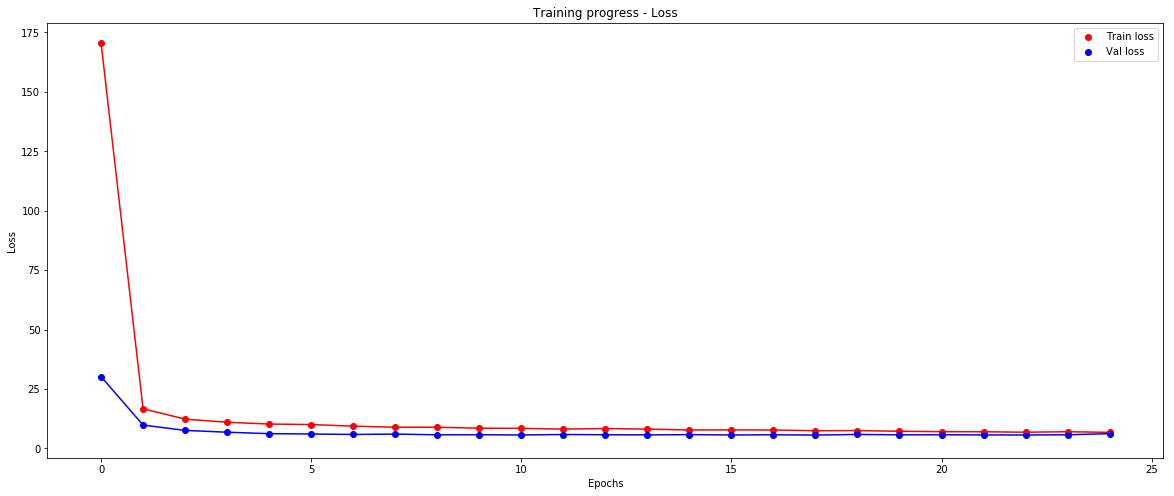

In [202]:
def train_model(samples, epochs, batch_size, log_interval, load_pretrained_model, log=True):
    import keras
    from keras import backend as K
    import os
    import time

    X_train, X_test, Y_train, Y_test, _, _, _ = samples
    features = X_train.shape[1]
    
    # Create Keras model
    if log: print("Network architecture:")
    model = keras.models.Sequential([
        keras.layers.Dense(64, input_shape=(features,), activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1)
    ])
    '''
    model = keras.models.Sequential([
        keras.layers.Dense(64, input_shape=(features,), use_bias=False),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(64, use_bias=False),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)
    ])
    '''
    if log: model.summary()
    
    # Compile model
    model.compile(optimizer='adam', loss='mse')
    
    # Callbacks
    def print_progress(epoch, logs):
        if log and epoch % log_interval == 0:
            loss = logs["loss"]
            val_loss = logs["val_loss"]
            rmse = np.sqrt(loss)
            val_rmse = np.sqrt(val_loss)
            print("\tEpoch {}, Loss: {}, Val Loss: {}, Val RMSE: {}".format(epoch, round(loss,2), round(val_loss,2), round(val_rmse,2)))
        
    model_path = "trained_model.hdf5"
    fit_callbacks = [
        keras.callbacks.ModelCheckpoint(model_path, monitor="loss", save_weights_only=True),
        keras.callbacks.LambdaCallback(on_epoch_end = lambda epoch, logs: print_progress(epoch, logs))
    ]
    
    # Load pre-trained model
    if load_pretrained_model and os.path.isfile(model_path):
        print("Loading pre-trained model: ", model_path)
        model.load_weights(model_path)
    
    # Train model
    if epochs > 0:
        if log: print("Training (epochs: {}, batch: {})...".format(epochs, batch_size))
        start_time = time.time()
        history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=0, callbacks=fit_callbacks, 
                            validation_data=(X_test, Y_test))
        elapsed_time_min = (time.time() - start_time) / 60.0
        model.save_weights(model_path)
        if log: print("Done ({} mins)".format(round(elapsed_time_min, 2)))

        # Test accuracy on train and test set
        if log: print("Predicting...")
        score_train = model.evaluate(X_train, Y_train, verbose=0)
        score_test = model.evaluate(X_test, Y_test, verbose=0)
        stats = {
            "training_time_min": elapsed_time_min,
            "train_loss": score_train,
            "test_loss": score_test,
            "train_rmse": np.sqrt(score_train),
            "test_rmse": np.sqrt(score_test)
        }
        if log:
            print("Train set - Loss: {}, RMSE: {}".format(round(stats["train_loss"],2), round(stats["train_rmse"],2)))
            print("Test set - Loss: {}, RMSE: {}".format(round(stats["test_loss"],2), round(stats["test_rmse"],2)))

        # Plot training
        if log: plot_training_progress(history)
    else:
        history = {}
        stats = {}
        print("Skipping training, using pre-loaded model")
    
    return (model, history, stats, model_path)
    
def plot_training_progress(history):
    from matplotlib import pyplot as plt
    def plot(title, x_axis_label, y_axis_label, y_label, y_data, y_val_label, y_val_data):
        x = np.arange(len(y_data))
        fig, ax = plt.subplots(1,1, figsize=(20,8))
        plt.scatter(x, y_data, c="red", label=y_label)
        plt.plot(x, y_data, color="red")
        plt.scatter(x, y_val_data, c="blue", label=y_val_label)
        plt.plot(x, y_val_data, color="blue")
        plt.title(title)
        plt.xlabel(x_axis_label)
        plt.ylabel(y_axis_label)
        plt.legend()
        plt.show()
    
    y_loss = np.array(history.history["loss"])
    y_val_loss = np.array(history.history["val_loss"])
    plot("Training progress - Loss", "Epochs", "Loss", "Train loss", y_loss, "Val loss", y_val_loss)

    
    
train_result = train_model(samples, epochs=25, batch_size=64, log_interval=1, load_pretrained_model=False, log=True)

In [ ]:
print("Training runs stats:")
pd.DataFrame([
    ["Base - 20 epochs, 32 batch, 0.2 dropoup, 2x64 lagers", 1.79, 2.6],
    ["64 epoch", 1.95, 2.51],
    ["RmsProp", 2.17, 2.65],
    ["Small features", 2.26, 2.47],
    ["Small features, 30 epochs", 2.2, 2.46],
    ["Small features, 25 epochs, 80% train", 2.26, 2.45],
    ["Most common features", 1.9, 2.44],
    ["Smaller features", 2.0, 2.4],
    ["No title tokens", 2.04, 2.42],
], columns=["Config", "Train RMSE", "Test RMSE"])

In [ ]:
def train_with_kfold(samples, categories_dict, epochs, batch_size, splits):
    from sklearn.model_selection import KFold
    X, _, Y, _, df, _, _ = samples
    print("Training K folds: ", splits)
    kfold = KFold(n_splits=splits, random_state=RAND_SEED, shuffle=True)
    i = 1
    results = []
    for train_index, test_index in kfold.split(X):
        print("Fold {}), Train: {}, Test: {}, epochs: {}, batch: {}".format(i, len(train_index), len(test_index), epochs, batch_size))
        fold_samples = (X[train_index], X[test_index], Y[train_index], Y[test_index], df.iloc[train_index], df.iloc[test_index], categories_dict)
        train_result = train_model(fold_samples, epochs=epochs, batch_size=batch_size, log_interval=100000, load_pretrained_model=False, log=False)
        results.append(train_result)
        model, history, stats, model_path = train_result
        print("\tTrain set - Loss: {}, RMSE: {}".format(round(stats["train_loss"],2), round(stats["train_rmse"],2)))
        print("\tTest set - Loss: {}, RMSE: {}".format(round(stats["test_loss"],2), round(stats["test_rmse"],2)))
        i += 1
        
    all_rmse = np.array([i[2]["test_rmse"] for i in results])
    print("RMSE avg: {}, min: {}, max: {}".format(round(all_rmse.mean(),2), round(all_rmse.min(),2), round(all_rmse.max(),2)))
    plot_training_progress(results[all_rmse.argmin()][1])
    return results
    
    
#kfold_results = train_with_kfold(all_samples, categories_dict, epochs=15, batch_size=32, splits=10)   

**Generate submission file**

In [ ]:
def generate_submission(model, df, categories_dict, using_log_label=False):
    X, _, Y, _, _, _, _ = create_samples(df.copy(), categories_dict, 1.0)
    Y_pred = model.predict(X).reshape((len(Y)))
    if using_log_label:
        Y_pred = np.expm1(Y_pred)
    else:
         Y_pred = Y_pred * 1000000.0
    submission = pd.DataFrame({"id": df["id"].values, "revenue": Y_pred})
    submission.to_csv('submission.csv', index=False)
    return submission
    
submission = generate_submission(train_result[0], test_df, categories_dict, using_log_label=True)
submission.head(30)

In [ ]:
def generate_submission_as_average(models, df, categories_dict):
    X, _, Y, _, _, _, _ = create_samples(df.copy(), categories_dict, 1.0)
    tot_samples = Y.shape[0]
    tot_models = len(models)
    all_predictions = np.zeros((tot_models, tot_samples))
    for i, model in enumerate(models): 
        Y_pred = model.predict(X).reshape((tot_samples)) * 1000000.0
        all_predictions[i] = Y_pred
    avg_pred = all_predictions.mean(axis=0)
    submission = pd.DataFrame({"id": df["id"].values, "revenue": avg_pred})
    submission.to_csv('submission.csv', index=False)
    return submission
    
#submission = generate_submission_as_average([i[0] for i in kfold_results], test_df, categories_dict)
#submission.head(30)

In [178]:
sum(i for i in range(10))

45